# Python数据处理的瑞士军刀 - pandas

## 第一篇：基本数据结构介绍


#### 一、Pandas介绍

终于写到了作者最想介绍，同时也是Python在数据处理方面功能最为强大的扩展模块了。在处理实际的金融数据时，一个条数据通常包含了多种类型的数据，例如，股票的代码是字符串，收盘价是浮点型，而成交量是整型等。在C++中可以实现为一个给定结构体作为单元的容器，如向量（vector，C++中的特定数据结构）。在Python中，pandas包含了高级的数据结构Series和DataFrame，使得在Python中处理数据变得非常方便、快速和简单。

pandas不同的版本之间存在一些不兼容性，为此，我们需要清楚使用的是哪一个版本的pandas。现在我们就查看一下量化实验室的pandas版本：

In [2]:
import pandas as pd
pd.__version__

'0.15.2'

pandas主要的两个数据结构是Series和DataFrame，随后两节将介绍如何由其他类型的数据结构得到这两种数据结构，或者自行创建这两种数据结构，我们先导入它们以及相关模块：

In [3]:
import numpy as np
from pandas import Series, DataFrame

#### 二、Pandas数据结构：Series

从一般意义上来讲，Series可以简单地被认为是一维的数组。Series和一维数组最主要的区别在于Series类型具有索引（index），可以和另一个编程中常见的数据结构哈希（Hash）联系起来。


##### 2.1 创建Series

创建一个Series的基本格式是 `s = Series(data, index=index, name=name)`，以下给出几个创建Series的例子。首先我们从数组创建Series：

In [5]:
a = np.random.randn(5)
print("a is an array:")
print(a)
s = Series(a)
print("s is a Series:")
print(s)

a is an array:
[ 0.55503144 -0.60832083  1.39523485  1.43339289 -0.18342857]
s is a Series:
0    0.555031
1   -0.608321
2    1.395235
3    1.433393
4   -0.183429
dtype: float64


可以在创建Series时添加index，并可使用Series.index查看具体的index。需要注意的一点是，当从数组创建Series时，若指定index，那么index长度要和data的长度一致：

In [7]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
s.index

a    0.846857
b   -2.493149
c    0.325951
d   -0.852810
e    0.525263
dtype: float64


Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

创建Series的另一个可选项是name，可指定Series的名称，可用Series.name访问。在随后的DataFrame中，每一列的列名在该列被单独取出来时就成了Series的名称：

In [9]:
s = Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'], name='my_series')
print(s)
print(s.name)

a   -0.298121
b   -0.330038
c    0.183048
d   -0.028127
e    0.190952
Name: my_series, dtype: float64
my_series


In [ ]:
Series还可以从字典（dict）创建：

In [12]:
d = {'a': 0., 'b': 1, 'c': 2}
print("d is a dict:")
print(d)
s = Series(d)
print("s is a Series:")
print(s)

d is a dict:
{'a': 0.0, 'c': 2, 'b': 1}
s is a Series:
a    0
b    1
c    2
dtype: float64


让我们来看看使用字典创建Series时指定index的情形（index长度不必和字典相同）：

In [14]:
Series(d, index=['b', 'c', 'd', 'a'])

b     1
c     2
d   NaN
a     0
dtype: float64

我们可以观察到两点：一是字典创建的Series，数据将按index的顺序重新排列；二是index长度可以和字典长度不一致，如果多了的话，pandas将自动为多余的index分配NaN（not a number，pandas中数据缺失的标准记号)，当然index少的话就截取部分的字典内容。

如果数据就是一个单一的变量，如数字4，那么Series将重复这个变量：

In [15]:
Series(4., index=['a', 'b', 'c', 'd', 'e'])

a    4
b    4
c    4
d    4
e    4
dtype: float64

##### 2.2 Series数据的访问

访问Series数据可以和数组一样使用下标，也可以像字典一样使用索引，还可以使用一些条件过滤：

In [26]:
s = Series(np.random.randn(10),index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

s[0] # 1.4328106520571824

s[:2]
# a    1.432811
# b    0.120681
# dtype: float64

s[[2,0,4]]  # index of 2, 0, 4
# c    0.578146
# a    1.432811
# e    1.327594
# dtype: float64

s[['e', 'i']]
# e    1.327594
# i   -0.634347
# dtype: float64

s[s > 0.5]
# a    1.432811
# c    0.578146
# e    1.327594
# g    1.850783
# dtype: float64

'e' in s
# True

a    1.242285
e    0.566892
f    1.958977
i    1.207246
j    1.199761
dtype: float64

#### 三、Pandas数据结构：DataFrame

在使用DataFrame之前，我们说明一下DataFrame的特性。DataFrame是将数个Series按列合并而成的二维数据结构，每一列单独取出来是一个Series，这和SQL数据库中取出的数据是很类似的。所以，按列对一个DataFrame进行处理更为方便，用户在编程时注意培养按列构建数据的思维。DataFrame的优势在于可以方便地处理不同类型的列，因此，就不要考虑如何对一个全是浮点数的DataFrame求逆之类的问题了，处理这种问题还是把数据存成NumPy的matrix类型比较便利一些。


##### 3.1 创建DataFrame

首先来看如何从字典创建DataFrame。DataFrame是一个二维的数据结构，是多个Series的集合体。我们先创建一个值是Series的字典，并转换为DataFrame：

In [33]:
d = {'one': Series([1., 2., 3.], index=['a', 'b', 'c']), 
     'two': Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
    }
df = DataFrame(d)
print(df)
df

   one  two
a    1    1
b    2    2
c    3    3
d  NaN    4


,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


可以指定所需的行和列，若字典中不含有对应的元素，则置为NaN：

In [31]:
df = DataFrame(d, index=['r', 'd', 'a'], columns=['two', 'three'])
print(df)

   two three
r  NaN   NaN
d    4   NaN
a    1   NaN


可以使用dataframe.index和dataframe.columns来查看DataFrame的行和列，dataframe.values则以数组的形式返回DataFrame的元素：

In [34]:
print("DataFrame index:")
print(df.index)
print("DataFrame columns:")
print(df.columns)
print("DataFrame values:")
print(df.values)

DataFrame index:
Index(['a', 'b', 'c', 'd'], dtype='object')
DataFrame columns:
Index(['one', 'two'], dtype='object')
DataFrame values:
[[  1.   1.]
 [  2.   2.]
 [  3.   3.]
 [ nan   4.]]


DataFrame也可以从值是数组的字典创建，但是各个数组的长度需要相同：

In [35]:
d = {'one': [1., 2., 3., 4.], 'two': [4., 3., 2., 1.]}
df = DataFrame(d, index=['a', 'b', 'c', 'd'])
print(df)

# 值非数组时，没有这一限制，并且缺失值补成NaN：

d= [{'a': 1.6, 'b': 2}, {'a': 3, 'b': 6, 'c': 9}]
df = DataFrame(d)
print(df)

   one  two
a    1    4
b    2    3
c    3    2
d    4    1
     a  b   c
0  1.6  2 NaN
1  3.0  6   9


在实际处理数据时，有时需要创建一个空的DataFrame，可以这么做：

In [36]:
df = DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


另一种创建DataFrame的方法十分有用，那就是使用concat函数基于Series或者DataFrame创建一个DataFrame

In [41]:
a = Series(range(5))
b = Series(np.linspace(4, 20, 5))
df = pd.concat([a, b], axis=1)
print(df)

   0   1
0  0   4
1  1   8
2  2  12
3  3  16
4  4  20


其中的axis=1表示按列进行合并，axis=0表示按行合并，并且，Series都处理成一列，所以这里如果选axis=0的话，将得到一个10×1的DataFrame。下面这个例子展示了如何按行合并DataFrame成一个大的DataFrame：

In [44]:
df = DataFrame()
index = ['alpha', 'beta', 'gamma', 'delta', 'eta']
for i in range(5):
    a = DataFrame([np.linspace(i, 5*i, 5)], index=[index[i]])
    df = pd.concat([df, a], axis=0)
print(df)
df

       0  1   2   3   4
alpha  0  0   0   0   0
beta   1  2   3   4   5
gamma  2  4   6   8  10
delta  3  6   9  12  15
eta    4  8  12  16  20


,0,1,2,3,4
alpha,0,0,0,0,0
beta,1,2,3,4,5
gamma,2,4,6,8,10
delta,3,6,9,12,15
eta,4,8,12,16,20


##### 3.2 DataFrame数据的访问

首先，再次强调一下DataFrame是以列作为操作的基础的，全部操作都想象成先从DataFrame里取一列，再从这个Series取元素即可。可以用dataframe.column_name选取列，也可以使用dataframe[]操作选取列，我们可以马上发现前一种方法只能选取一列，而后一种方法可以选择多列。若DataFrame没有列名，[]可以使用非负整数，也就是“下标”选取列；若有列名，则必须使用列名选取，另外dataframe.column_name在没有列名的时候是无效的：

In [45]:
print(df[1])
print(type(df[1]))
df.columns = ['a', 'b', 'c', 'd', 'e']
print(df['b'])
print(type(df['b']))
print(df.b)
print(type(df.b))
print(df[['a', 'd']])
print(type(df[['a', 'd']]))

alpha    0
beta     2
gamma    4
delta    6
eta      8
Name: 1, dtype: float64
<class 'pandas.core.series.Series'>
alpha    0
beta     2
gamma    4
delta    6
eta      8
Name: b, dtype: float64
<class 'pandas.core.series.Series'>
alpha    0
beta     2
gamma    4
delta    6
eta      8
Name: b, dtype: float64
<class 'pandas.core.series.Series'>
       a   d
alpha  0   0
beta   1   4
gamma  2   8
delta  3  12
eta    4  16
<class 'pandas.core.frame.DataFrame'>


以上代码使用了dataframe.columns为DataFrame赋列名，并且我们看到单独取一列出来，其数据结构显示的是Series，取两列及两列以上的结果仍然是DataFrame。访问特定的元素可以如Series一样使用下标或者是索引:

In [46]:
print(df['b'][2])
print(df['b']['gamma'])

4.0
4.0


In [ ]:
若需要选取行，可以使用dataframe.iloc按下标选取，或者使用dataframe.loc按索引选取：

In [47]:
print(df.iloc[1])
print(df.loc['beta'])

a    1
b    2
c    3
d    4
e    5
Name: beta, dtype: float64
a    1
b    2
c    3
d    4
e    5
Name: beta, dtype: float64


选取行还可以使用切片的方式或者是布尔类型的向量：

In [48]:
print("Selecting by slices:")
print(df[1:3])
bool_vec = [True, False, True, True, False]
print("Selecting by boolean vector:")
print(df[bool_vec])

Selecting by slices:
       a  b  c  d   e
beta   1  2  3  4   5
gamma  2  4  6  8  10
Selecting by boolean vector:
       a  b  c   d   e
alpha  0  0  0   0   0
gamma  2  4  6   8  10
delta  3  6  9  12  15


行列组合起来选取数据：

In [49]:
print(df[['b', 'd']].iloc[[1, 3]])
print(df.iloc[[1, 3]][['b', 'd']])
print(df[['b', 'd']].loc[['beta', 'delta']])
print(df.loc[['beta', 'delta']][['b', 'd']])

       b   d
beta   2   4
delta  6  12
       b   d
beta   2   4
delta  6  12
       b   d
beta   2   4
delta  6  12
       b   d
beta   2   4
delta  6  12


如果不是需要访问特定行列，而只是某个特殊位置的元素的话，dataframe.at和dataframe.iat是最快的方式，它们分别用于使用索引和下标进行访问：

In [50]:
print(df.iat[2, 3])
print(df.at['gamma', 'd'])

8.0
8.0


dataframe.ix可以混合使用索引和下标进行访问，唯一需要注意的地方是行列内部需要一致，不可以同时使用索引和标签访问行或者列，不然的话，将会得到意外的结果：

In [52]:
print(df.ix['gamma', 4])
print(df.ix[['delta', 'gamma'], [1, 4]])
print(df.ix[[1, 2], ['b', 'e']])
print("Unwanted result:")
print(df.ix[['beta', 2], ['b', 'e']])
print(df.ix[[1, 2], ['b', 4]])

10.0
       b   e
delta  6  15
gamma  4  10
       b   e
beta   2   5
gamma  4  10
Unwanted result:
       b   e
beta   2   5
2    NaN NaN
       b   4
beta   2 NaN
gamma  4 NaN



#### 参考文献

http://pandas.pydata.org/pandas-docs/version/0.14.1

# 数据处理的瑞士军刀pandas下篇

#### 第二篇：快速进阶

在上一篇中我们介绍了如何创建并访问pandas的Series和DataFrame类型的数据，本篇将介绍如何对pandas数据进行操作，掌握这些操作之后，基本可以处理大多数的数据了。首先，导入本篇中使用到的模块：

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

为了看数据方便一些，我们设置一下输出屏幕的宽度

In [2]:
pd.set_option('display.width', 200)

#### 一、数据创建的其他方式

数据结构的创建不止是上篇介绍的标准形式，本篇再介绍几种。例如，我们可以创建一个以日期为元素的Series：

In [3]:
dates = pd.date_range('20150101', periods=5)
print(dates)

<class 'pandas.tseries.index.DatetimeIndex'>
[2015-01-01, ..., 2015-01-05]
Length: 5, Freq: D, Timezone: None


将这个日期Series作为索引赋给一个DataFrame：

In [4]:
df = pd.DataFrame(np.random.randn(5, 4),index=dates,columns=list('ABCD'))
print(df)

                   A         B         C         D
2015-01-01  0.122242 -0.464468 -0.195074 -0.051972
2015-01-02  0.525616  0.588000 -0.670694  0.829126
2015-01-03  1.961413 -0.829747 -0.093251 -1.383049
2015-01-04 -1.534112  1.074455 -0.486655 -0.492200
2015-01-05 -0.222826  1.024643  0.581390 -0.006940


只要是能转换成Series的对象，都可以用于创建DataFrame：

In [6]:
df2 = pd.DataFrame({'A' : 1., 
                    'B': pd.Timestamp('20150214'), 
                    'C': pd.Series(1.6,index=list(range(4)),dtype='float64'), 
                    'D': np.array([4] * 4, dtype='int64'), 
                    'E': 'hello pandas!' })
print(df2)

   A          B    C  D              E
0  1 2015-02-14  1.6  4  hello pandas!
1  1 2015-02-14  1.6  4  hello pandas!
2  1 2015-02-14  1.6  4  hello pandas!
3  1 2015-02-14  1.6  4  hello pandas!


#### 二、数据的查看

在多数情况下，数据并不由分析数据的人员生成，而是通过数据接口、外部文件或者其他方式获取。这里我们通过量化实验室的数据接口获取一份数据作为示例：

In [ ]:
stock_list = ['000001.XSHE', '000002.XSHE', '000568.XSHE', '000625.XSHE', '000768.XSHE', '600028.XSHG', '600030.XSHG', '601111.XSHG', '601390.XSHG', '601998.XSHG']
raw_data = DataAPI.MktEqudGet(secID=stock_list, beginDate='20150101', endDate='20150131', pandas='1')
df = raw_data[['secID', 'tradeDate', 'secShortName', 'openPrice', 'highestPrice', 'lowestPrice', 'closePrice', 'turnoverVol']]

# 没有 Uqer.io 的 DtaAPI, 改用下面的 tushare

In [7]:
import tushare as ts
df1 = ts.get_hist_data('000001', start='2015-01-01', end='2015-01-31')
# care about date string format YYmmdd YY-mm-dd
df1
df = df1
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-30,13.93,14.12,13.93,13.76,930116.69,0.03,0.22,14.044,14.100,14.665,1116969.57,1386771.81,1547106.16,0.95
2015-01-29,13.82,14.01,13.90,13.75,1016753.31,-0.16,-1.14,14.138,14.244,14.761,1222782.61,1449344.78,1620603.62,1.03
2015-01-28,13.87,14.30,14.06,13.80,1240877.50,0.07,0.50,14.218,14.389,14.841,1270435.17,1471886.49,1688069.88,1.26
2015-01-27,14.35,14.37,13.99,13.83,1339494.62,-0.35,-2.44,14.290,14.464,14.884,1410365.75,1474101.70,1755333.41,1.36
2015-01-26,14.36,14.44,14.34,14.16,1057605.75,-0.06,-0.42,14.258,14.533,14.939,1440670.45,1421839.71,1810212.34,1.08
2015-01-23,14.36,14.63,14.40,14.30,1459181.88,0.10,0.70,14.156,14.576,14.957,1656574.05,1471408.23,1857195.85,1.48
2015-01-22,14.34,14.52,14.30,14.16,1255016.12,-0.12,-0.83,14.350,14.644,14.940,1675906.95,1576340.06,1884750.31,1.28
2015-01-21,13.88,14.60,14.42,13.75,1940530.38,0.59,4.27,14.560,14.710,14.963,1673337.80,1591609.88,1911892.04,1.97
2015-01-20,13.83,14.06,13.83,13.56,1491018.12,0.00,0.00,14.638,14.816,15.009,1537837.65,1567568.90,1988235.08,1.52


以上代码获取了2015年一月份全部的交易日内十支股票的日行情信息，首先我们来看一下数据的大小：

In [9]:
print(df.shape)
df.columns
df.index

(20, 14)


Index(['2015-01-30', '2015-01-29', '2015-01-28', '2015-01-27', '2015-01-26', '2015-01-23', '2015-01-22', '2015-01-21', '2015-01-20', '2015-01-19', '2015-01-16', '2015-01-15', '2015-01-14', '2015-01-13', '2015-01-12', '2015-01-09', '2015-01-08', '2015-01-07', '2015-01-06', '2015-01-05'], dtype='object')

我们可以看到有200行，表示我们获取到了200条记录，每条记录有8个字段，现在预览一下数据，dataframe.head()和dataframe.tail()可以查看数据的头五行和尾五行，若需要改变行数，可在括号内指定：

In [10]:
print("Head of this DataFrame:")
print(df.head())
print("Tail of this DataFrame:")
print(df.tail(3))

Head of this DataFrame:
             open   high  close    low      volume  price_change  p_change     ma5    ma10    ma20       v_ma5      v_ma10      v_ma20  turnover
date                                                                                                                                            
2015-01-30  13.93  14.12  13.93  13.76   930116.69          0.03      0.22  14.044  14.100  14.665  1116969.57  1386771.81  1547106.16      0.95
2015-01-29  13.82  14.01  13.90  13.75  1016753.31         -0.16     -1.14  14.138  14.244  14.761  1222782.61  1449344.78  1620603.62      1.03
2015-01-28  13.87  14.30  14.06  13.80  1240877.50          0.07      0.50  14.218  14.389  14.841  1270435.17  1471886.49  1688069.88      1.26
2015-01-27  14.35  14.37  13.99  13.83  1339494.62         -0.35     -2.44  14.290  14.464  14.884  1410365.75  1474101.70  1755333.41      1.36
2015-01-26  14.36  14.44  14.34  14.16  1057605.75         -0.06     -0.42  14.258  14.533  14.939  144067

dataframe.describe()提供了DataFrame中纯数值数据的统计信息：

In [11]:
df.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,14.655000,14.984000,14.665000,14.433000,1547106.162500,-0.09550,-0.599000,14.817700,14.902300,14.926100,1684265.081000,1807385.316000,2082896.547500,1.57250
std,0.701911,0.741488,0.677142,0.642389,534104.460601,0.43511,2.885541,0.559332,0.409793,0.124865,417395.932792,356737.889023,336430.880365,0.54275
min,13.820000,14.010000,13.830000,13.560000,816874.750000,-1.54000,-10.020000,14.044000,14.100000,14.665000,1116969.570000,1386771.810000,1547106.160000,0.83000
25%,13.990000,14.422500,14.042500,13.822500,1241847.160000,-0.25500,-1.600000,14.282000,14.565250,14.836750,1408526.557500,1473547.897500,1845449.972500,1.26000
50%,14.505000,14.765000,14.550000,14.400000,1433448.065000,-0.03000,-0.210000,14.834000,15.067000,14.939500,1567568.900000,1671274.875000,2018782.650000,1.45500
75%,15.025000,15.582500,15.147500,14.757500,1760223.060000,0.10500,0.725000,15.276500,15.246250,15.009250,1927145.055000,2194516.657500,2307477.822500,1.79000
max,15.990000,16.390000,16.020000,15.600000,2860436.500000,0.59000,4.270000,15.724000,15.345000,15.120000,2529960.450000,2408901.260000,2739781.610000,2.91000


对数据的排序将便利我们观察数据，DataFrame提供了两种形式的排序。一种是按行列排序，即按照索引（行名）或者列名进行排序，可调用dataframe.sort_index，指定axis=0表示按索引（行名）排序，axis=1表示按列名排序，并可指定升序或者降序：

In [12]:
print("Order by column names, descending:")
df.sort_index(axis=1, ascending=False).head()

Order by column names, descending:


,volume,v_ma5,v_ma20,v_ma10,turnover,price_change,p_change,open,ma5,ma20,ma10,low,high,close
date,,,,,,,,,,,,,,
2015-01-30,930116.69,1116969.57,1547106.16,1386771.81,0.95,0.03,0.22,13.93,14.044,14.665,14.100,13.76,14.12,13.93
2015-01-29,1016753.31,1222782.61,1620603.62,1449344.78,1.03,-0.16,-1.14,13.82,14.138,14.761,14.244,13.75,14.01,13.90
2015-01-28,1240877.50,1270435.17,1688069.88,1471886.49,1.26,0.07,0.50,13.87,14.218,14.841,14.389,13.80,14.30,14.06
2015-01-27,1339494.62,1410365.75,1755333.41,1474101.70,1.36,-0.35,-2.44,14.35,14.290,14.884,14.464,13.83,14.37,13.99
2015-01-26,1057605.75,1440670.45,1810212.34,1421839.71,1.08,-0.06,-0.42,14.36,14.258,14.939,14.533,14.16,14.44,14.34


第二种排序是按值排序，可指定列名和排序方式，默认的是升序排序：

In [13]:
print("Order by column value, ascending:")
df.sort(columns='high').head()
df.sort(columns='high', ascending=False).head()

Order by column value, ascending:


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-06,15.85,16.39,15.78,15.55,2166421.50,-0.24,-1.50,15.612,15.201,14.811,2475830.10,2408901.26,2627417.84,2.20
2015-01-05,15.99,16.28,16.02,15.60,2860436.50,0.18,1.14,15.476,15.123,14.749,2529960.45,2385799.70,2739781.61,2.91
2015-01-09,14.90,15.87,15.08,14.71,2508500.25,0.12,0.80,15.464,15.337,14.931,2128638.62,2242983.48,2333154.26,2.55
2015-01-07,15.56,15.83,15.48,15.30,1700120.62,-0.30,-1.90,15.724,15.215,14.824,2298624.57,2232174.20,2516006.74,1.73
2015-01-16,15.40,15.62,15.37,15.18,1555846.38,0.02,0.13,14.996,15.230,15.120,1286242.40,1707440.51,2027110.83,1.58


In [14]:
print("Order by multiple columns value:")
df.sort(columns=['volume', 'low'], ascending=[False, True]).head()

Order by multiple columns value:


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-05,15.99,16.28,16.02,15.60,2860436.50,0.18,1.14,15.476,15.123,14.749,2529960.45,2385799.70,2739781.61,2.91
2015-01-09,14.90,15.87,15.08,14.71,2508500.25,0.12,0.80,15.464,15.337,14.931,2128638.62,2242983.48,2333154.26,2.55
2015-01-06,15.85,16.39,15.78,15.55,2166421.50,-0.24,-1.50,15.612,15.201,14.811,2475830.10,2408901.26,2627417.84,2.20
2015-01-19,14.01,14.57,13.83,13.83,2137123.75,-1.54,-10.02,14.808,15.011,15.067,1403008.98,1635109.24,2010454.47,2.17
2015-01-21,13.88,14.60,14.42,13.75,1940530.38,0.59,4.27,14.560,14.710,14.963,1673337.80,1591609.88,1911892.04,1.97


#### 三、数据的访问和操作


##### 3.1 再谈数据的访问

上篇中已经介绍了使用loc、iloc、at、iat、ix以及[]访问DataFrame数据的几种方式，这里再介绍一种方法，使用":"来获取部行或者全部列：

In [20]:
df.iloc[1:4][:]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-29,13.82,14.01,13.90,13.75,1016753.31,-0.16,-1.14,14.138,14.244,14.761,1222782.61,1449344.78,1620603.62,1.03
2015-01-28,13.87,14.30,14.06,13.80,1240877.50,0.07,0.50,14.218,14.389,14.841,1270435.17,1471886.49,1688069.88,1.26
2015-01-27,14.35,14.37,13.99,13.83,1339494.62,-0.35,-2.44,14.290,14.464,14.884,1410365.75,1474101.70,1755333.41,1.36


我们可以扩展上篇介绍的使用布尔类型的向量获取数据的方法，可以很方便地过滤数据，例如，我们要选出收盘价在均值以上的数据：

In [23]:
df[df.close > df.close.mean()].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-16,15.40,15.62,15.37,15.18,1555846.38,0.02,0.13,14.996,15.230,15.120,1286242.40,1707440.51,2027110.83,1.58
2015-01-15,14.85,15.35,15.35,14.71,1242170.38,0.54,3.65,14.938,15.277,15.120,1476773.18,1791862.45,2169326.81,1.26
2015-01-14,14.78,15.20,14.81,14.70,1263029.62,0.13,0.89,14.860,15.292,15.072,1509881.95,1904253.26,2230671.94,1.28
2015-01-13,14.65,14.90,14.68,14.61,816874.75,-0.09,-0.61,14.994,15.303,15.010,1597300.15,2036565.13,2257567.29,0.83
2015-01-12,14.87,15.05,14.77,14.50,1553290.88,-0.31,-2.06,15.214,15.345,14.973,1867209.50,2198584.98,2298919.01,1.58


isin()函数可方便地过滤DataFrame中的数据：

In [27]:
df_filtered = df[df['open'].isin([15.4, 14.85])]
print(df.shape) # => df is not modified
df_filtered

(20, 14)


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2015-01-16,15.40,15.62,15.37,15.18,1555846.38,0.02,0.13,14.996,15.230,15.12,1286242.40,1707440.51,2027110.83,1.58
2015-01-15,14.85,15.35,15.35,14.71,1242170.38,0.54,3.65,14.938,15.277,15.12,1476773.18,1791862.45,2169326.81,1.26


##### 3.2 处理缺失数据

在访问数据的基础上，我们可以更改数据，例如，修改某些元素为缺失值：

In [34]:
df = df[['open', 'high', 'close', 'low', 'volume']]
print(df)
# df_mini['close'][df['volume'] < 1500000] = np.nan
# df_mini
# try to modify a slice from a DataFrame will get warning
df['close'][df['volume'] < 1500000] = np.nan
df

             open   high  close    low      volume
date                                              
2015-01-30  13.93  14.12    NaN  13.76   930116.69
2015-01-29  13.82  14.01    NaN  13.75  1016753.31
2015-01-28  13.87  14.30    NaN  13.80  1240877.50
2015-01-27  14.35  14.37    NaN  13.83  1339494.62
2015-01-26  14.36  14.44    NaN  14.16  1057605.75
2015-01-23  14.36  14.63    NaN  14.30  1459181.88
2015-01-22  14.34  14.52    NaN  14.16  1255016.12
2015-01-21  13.88  14.60  14.42  13.75  1940530.38
2015-01-20  13.83  14.06    NaN  13.56  1491018.12
2015-01-19  14.01  14.57  13.83  13.83  2137123.75
2015-01-16  15.40  15.62    NaN  15.18  1555846.38
2015-01-15  14.85  15.35    NaN  14.71  1242170.38
2015-01-14  14.78  15.20    NaN  14.70  1263029.62
2015-01-13  14.65  14.90    NaN  14.61   816874.75
2015-01-12  14.87  15.05  14.77  14.50  1553290.88
2015-01-09  14.90  15.87  15.08  14.71  2508500.25
2015-01-08  15.50  15.57    NaN  14.90  1407714.25
2015-01-07  15.56  15.83  15.48

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3368: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,open,high,close,low,volume
date,,,,,
2015-01-30,13.93,14.12,NaN,13.76,930116.69
2015-01-29,13.82,14.01,NaN,13.75,1016753.31
2015-01-28,13.87,14.30,NaN,13.80,1240877.50
2015-01-27,14.35,14.37,NaN,13.83,1339494.62
2015-01-26,14.36,14.44,NaN,14.16,1057605.75
2015-01-23,14.36,14.63,NaN,14.30,1459181.88
2015-01-22,14.34,14.52,NaN,14.16,1255016.12
2015-01-21,13.88,14.60,14.42,13.75,1940530.38
2015-01-20,13.83,14.06,NaN,13.56,1491018.12



原始数据中很可能存在一些数据的缺失，就如同现在处理的这个样例数据一样，处理缺失数据有多种方式。通常使用dataframe.dropna()，dataframe.dropna()可以按行丢弃带有nan的数据；若指定how='all'（默认是'any'），则只在整行全部是nan时丢弃数据；若指定thresh，则表示当某行数据非缺失列数超过指定数值时才保留；要指定根据某列丢弃可以通过subset完成。

In [41]:
print("Data size before filtering:")
print(df.shape)

print("Drop all rows that have any NaN values:")
print("Data size after filtering:")
print(df.dropna().shape)
print(df.dropna().head(3))

print("Drop only if all columns are NaN:")
print("Data size after filtering:")
print(df.dropna(how='all').shape)
print(df.dropna(how='all').head(3))

print("Drop rows who do not have at least six values that are not NaN")
print("Data size after filtering:")
print(df.dropna(thresh=6).shape)
print(df.dropna(thresh=6).head(3))


print("Drop only if NaN in specific column:")
print("Data size after filtering:")
print(df.dropna(subset=['close']).shape)
print(df.dropna(subset=['close']).head(3))

Data size before filtering:
(20, 5)
Drop all rows that have any NaN values:
Data size after filtering:
(7, 5)
             open   high  close    low      volume
date                                              
2015-01-21  13.88  14.60  14.42  13.75  1940530.38
2015-01-19  14.01  14.57  13.83  13.83  2137123.75
2015-01-12  14.87  15.05  14.77  14.50  1553290.88
Drop only if all columns are NaN:
Data size after filtering:
(20, 5)
             open   high  close    low      volume
date                                              
2015-01-30  13.93  14.12    NaN  13.76   930116.69
2015-01-29  13.82  14.01    NaN  13.75  1016753.31
2015-01-28  13.87  14.30    NaN  13.80  1240877.50
Drop rows who do not have at least six values that are not NaN
Data size after filtering:
(0, 5)
Empty DataFrame
Columns: [open, high, close, low, volume]
Index: []
Drop only if NaN in specific column:
Data size after filtering:
(7, 5)
             open   high  close    low      volume
date                    

有数据缺失时也未必是全部丢弃，dataframe.fillna(value=value)可以指定填补缺失值的数值

In [44]:
df.fillna(value=1000)

,open,high,close,low,volume
date,,,,,
2015-01-30,13.93,14.12,1000.00,13.76,930116.69
2015-01-29,13.82,14.01,1000.00,13.75,1016753.31
2015-01-28,13.87,14.30,1000.00,13.80,1240877.50
2015-01-27,14.35,14.37,1000.00,13.83,1339494.62
2015-01-26,14.36,14.44,1000.00,14.16,1057605.75
2015-01-23,14.36,14.63,1000.00,14.30,1459181.88
2015-01-22,14.34,14.52,1000.00,14.16,1255016.12
2015-01-21,13.88,14.60,14.42,13.75,1940530.38
2015-01-20,13.83,14.06,1000.00,13.56,1491018.12


##### 3.3 数据操作

Series和DataFrame的类函数提供了一些函数，如mean()、sum()等，指定0按列进行，指定1按行进行：

In [50]:
df.mean(0)

open           14.655000
high           14.984000
close          15.054286
low            14.433000
volume    1547106.162500
dtype: float64

value_counts函数可以方便地统计频数：

In [55]:
df['close'].value_counts()

15.78    1
14.42    1
16.02    1
14.77    1
15.48    1
15.08    1
13.83    1
dtype: int64

在panda中，Series可以调用map函数来对每个元素应用一个函数，DataFrame可以调用apply函数对每一列（行）应用一个函数，applymap对每个元素应用一个函数。这里面的函数可以是用户自定义的一个lambda函数，也可以是已有的其他函数。下例展示了将收盘价调整到[0, 1]区间：

In [56]:
df[['close']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

,close
date,
2015-01-30,NaN
2015-01-29,NaN
2015-01-28,NaN
2015-01-27,NaN
2015-01-26,NaN
2015-01-23,NaN
2015-01-22,NaN
2015-01-21,0.269406
2015-01-20,NaN


使用append可以在Series后添加元素，以及在DataFrame尾部添加一行：

In [59]:
dat1 = df[['open', 'close']].head()
dat2 = df[['open', 'close']].iloc[2]
print("Before appending:")
print(dat1)
dat = dat1.append(dat2, ignore_index=True)
print("After appending:")
print(dat)

Before appending:
             open  close
date                    
2015-01-30  13.93    NaN
2015-01-29  13.82    NaN
2015-01-28  13.87    NaN
2015-01-27  14.35    NaN
2015-01-26  14.36    NaN
After appending:
    open  close
0  13.93    NaN
1  13.82    NaN
2  13.87    NaN
3  14.35    NaN
4  14.36    NaN
5  13.87    NaN


DataFrame可以像在SQL中一样进行合并，在上篇中，我们介绍了使用concat函数创建DataFrame，这就是一种合并的方式。另外一种方式使用merge函数，需要指定依照哪些列进行合并，下例展示了如何根据security ID和交易日合并数据：

In [61]:
dat1 = df[['open', 'close', 'high']]
dat2 = df[['open', 'close', 'volume']]
dat = dat1.merge(dat2, on=['open', 'close'])
print("The first DataFrame:")
print(dat1.head())
print("The second DataFrame:")
print(dat2.head())
print("Merged DataFrame:")
print(dat.head())

The first DataFrame:
             open  close   high
date                           
2015-01-30  13.93    NaN  14.12
2015-01-29  13.82    NaN  14.01
2015-01-28  13.87    NaN  14.30
2015-01-27  14.35    NaN  14.37
2015-01-26  14.36    NaN  14.44
The second DataFrame:
             open  close      volume
date                                
2015-01-30  13.93    NaN   930116.69
2015-01-29  13.82    NaN  1016753.31
2015-01-28  13.87    NaN  1240877.50
2015-01-27  14.35    NaN  1339494.62
2015-01-26  14.36    NaN  1057605.75
Merged DataFrame:
    open  close   high      volume
0  13.93    NaN  14.12   930116.69
1  13.82    NaN  14.01  1016753.31
2  13.87    NaN  14.30  1240877.50
3  14.35    NaN  14.37  1339494.62
4  14.36    NaN  14.44  1057605.75


DataFrame另一个强大的函数是groupby，可以十分方便地对数据分组处理，我们对2015年一月内十支股票的开盘价，最高价，最低价，收盘价和成交量求平均值：

In [ ]:
df_grp = df.groupby('secID')
grp_mean = df_grp.mean()
print(grp_mean)
#              openPrice  highestPrice  lowestPrice  closePrice  turnoverVol
# secID                                                                     
# 000001.XSHE    14.6550       14.9840      14.4330     14.6650    154710615
# 000002.XSHE    13.3815       13.7530      13.0575     13.4100    277459431
# 000568.XSHE    19.7220       20.1015      19.4990     19.7935     29199107
# 000625.XSHE    19.4915       20.2275      19.1040     19.7170     42633332
# 000768.XSHE    22.4345       23.4625      21.8830     22.6905     92781199
# 600028.XSHG     6.6060        6.7885       6.4715      6.6240    531966632
# 600030.XSHG    31.1505       32.0825      30.4950     31.2325    611544509
# 601111.XSHG     8.4320        8.6520       8.2330      8.4505    104143358
# 601390.XSHG     8.4060        8.6625       8.2005      8.4100    362831455
# 601998.XSHG     7.4305        7.6260       7.2780      7.4345    177541066

如果希望取每只股票的最新数据，应该怎么操作呢？drop_duplicates可以实现这个功能，首先对数据按日期排序，再按security ID去重：

In [ ]:
df2 = df.sort(columns=['secID', 'tradeDate'], ascending=[True, False])
print(df2.drop_duplicates(subset='secID'))

#            secID   tradeDate secShortName  openPrice  highestPrice  lowestPrice  closePrice  turnoverVol
# 19   000001.XSHE  2015-01-30         平安银行      13.93         14.12        13.76       13.93     93011669
# 39   000002.XSHE  2015-01-30          万科A      13.09         13.49        12.80       13.12    209624706
# 59   000568.XSHE  2015-01-30         泸州老窖      19.15         19.51        19.11       19.12     14177179
# 79   000625.XSHE  2015-01-30         长安汽车      19.16         19.45        18.92       19.18     21233495
# 99   000768.XSHE  2015-01-30         中航飞机      25.38         25.65        24.28       24.60     59550293
# 119  600028.XSHG  2015-01-30         中国石化       6.14          6.17         6.02        6.03    502445638
# 139  600030.XSHG  2015-01-30         中信证券      28.50         28.72        27.78       27.86    304218245
# 159  601111.XSHG  2015-01-30         中国国航       7.92          8.03         7.65        7.69     61877792
# 179  601390.XSHG  2015-01-30         中国中铁       8.69          8.69         8.12        8.14    352357431
# 199  601998.XSHG  2015-01-30         中信银行       7.10          7.14         6.92        6.95     68146718

若想要保留最老的数据，可以在降序排列后取最后一个记录，通过指定take_last=True（默认值为False，取第一条记录）可以实现：

In [ ]:
print(df2.drop_duplicates(subset='secID', take_last=True))

#            secID   tradeDate secShortName  openPrice  highestPrice  lowestPrice  closePrice  turnoverVol
# 0    000001.XSHE  2015-01-05         平安银行      15.99         16.28        15.60       16.02    286043643
# 20   000002.XSHE  2015-01-05          万科A      14.39         15.29        14.22       14.91    656083570
# 40   000568.XSHE  2015-01-05         泸州老窖      20.50         21.99        20.32       21.90     59304755
# 60   000625.XSHE  2015-01-05         长安汽车      16.40         18.07        16.32       18.07     82087982
# 80   000768.XSHE  2015-01-05         中航飞机      18.76         19.88        18.41       19.33     84199357
# 100  600028.XSHG  2015-01-05         中国石化       6.59          7.14         6.45        7.14   1186499645
# 120  600030.XSHG  2015-01-05         中信证券      33.90         35.25        33.01       34.66    698627215
# 140  601111.XSHG  2015-01-05         中国国航       7.98          8.62         7.98        8.62    231611758
# 160  601390.XSHG  2015-01-05         中国中铁       9.37          9.37         8.90        9.13    469902172
# 180  601998.XSHG  2015-01-05         中信银行       8.15          8.33         7.91        8.16    337368242

#### 四、数据可视化

pandas数据直接可以绘图查看，下例中我们采用中国石化一月的收盘价进行绘图，其中set_index('tradeDate')['closePrice']表示将DataFrame的'tradeDate'这一列作为索引，将'closePrice'这一列作为Series的值，返回一个Series对象，随后调用plot函数绘图，更多的参数可以在matplotlib的文档中查看。

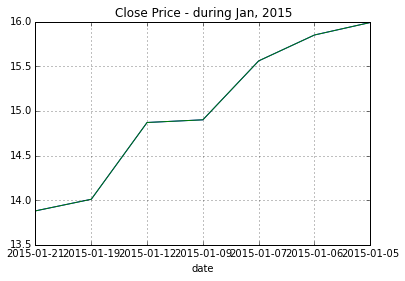

In [64]:
%matplotlib inline
# dat = df[df['secID'] == '600028.XSHG'].set_index('tradeDate')['closePrice']
dat.plot(title="Close Price of SINOPEC (600028) during Jan, 2015")

dat = df[df['close'] > 0]['open']
dat.plot(title="Price - during Jan, 2015")



#### 参考文献

http://pandas.pydata.org/pandas-docs/version/0.14.1